In [0]:
#!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-183312-Tue-Mar-31-2020.wget.sh
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-135016-Mon-Apr-6-2020.wget.sh


In [0]:
!sh amiBuild-135016-Mon-Apr-6-2020.wget.sh

In [0]:
!nvidia-smi

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import librosa
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# loop over all files in the current directory ending with .txt
for fname in glob("/content/drive/My Drive/kk/AMI_Corpus/ES2008a.A*.wav"):
  x , sr = librosa.load(fname)
  import librosa.display
  plt.figure(figsize=(14, 5))
  librosa.display.waveplot(x,sr=sr)

In [17]:
x.shape

(23006088,)

In [0]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform, Initializer, Constant

In [19]:
x.shape


(23006088,)

In [20]:
from glob import glob
import numpy as np
import librosa
X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
#for fname in glob("/content/amicorpus/ES2011a/audio/*.wav"):
for fname in glob("/content/drive/My Drive/kk/AMI_Corpus/ES2008a.A*.wav"):  
    #struct = fname.split('_')
    #digit = struct[0]
    print(fname)
    wav, sr = librosa.load(fname)
    padded = pad(wav, 3000)
    X.append(padded)

/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-01.wav
/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-02.wav
/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-03.wav
/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-04.wav
/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-05.wav
/content/drive/My Drive/kk/AMI_Corpus/ES2008a.Array1-06.wav


In [0]:
X=np.vstack(X)

In [22]:
X.shape

(6, 3000)

In [25]:
#dont run this ..this is not used 
rbflayer = RBFLayer(X.shape[0],
                        initializer=InitCentersRandom(X),
                        betas=1.0,
                        input_shape=(X.shape[1],))

NameError: ignored

In [26]:
#dont run this 
model = Sequential()
model.add(rbflayer)

NameError: ignored

In [0]:
#new way RBF 
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


In [0]:
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Flatten(input_shape=(1,X.shape[1])))
model.add(RBFLayer(100, 0.5))

In [0]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 3000)              0         
_________________________________________________________________
rbf_layer_9 (RBFLayer)       (None, 100)               300000    
Total params: 300,000
Trainable params: 300,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
#now decode it
model.add(RBFLayer(3000, 0.5))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3000)              0         
_________________________________________________________________
rbf_layer (RBFLayer)         (None, 100)               300000    
_________________________________________________________________
rbf_layer_1 (RBFLayer)       (None, 3000)              300000    
Total params: 600,000
Trainable params: 600,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [32]:
X.shape

(6, 3000)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.3)

In [34]:
X_train.shape,X_test.shape


((4, 3000), (2, 3000))

In [35]:
model.fit(X_train,X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
1/1 [==============================] - 0s 165ms/step - loss: 0.0181 - val_loss: 0.0103
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0103 - val_loss: 0.0059
Epoch 3/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 11/100
1/1 [

In [36]:
y=model.predict(X_test)

In [37]:
y.shape,
print(y)

[[2.2612921e-05 2.1207734e-05 2.1311520e-05 ... 1.1873695e-04
  1.4290867e-04 1.6214937e-04]
 [2.3958262e-05 2.2470653e-05 2.2582146e-05 ... 1.2520603e-04
  1.5063460e-04 1.7085782e-04]]


In [0]:
#import os
#os.chdir(give ur local path) then run below so it can be saved
for i in range(y.shape[0]):
  #give full path here before file_  ex - give local path of ur system if needed
  f = open("file_"+str(i)+".wav","wb")
  data=y[i]
  librosa.output.write_wav(f,data,sr=sr)
  

/content/file_0.wav
/content/file_1.wav


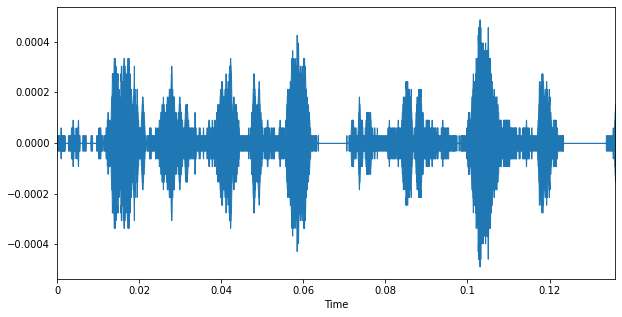

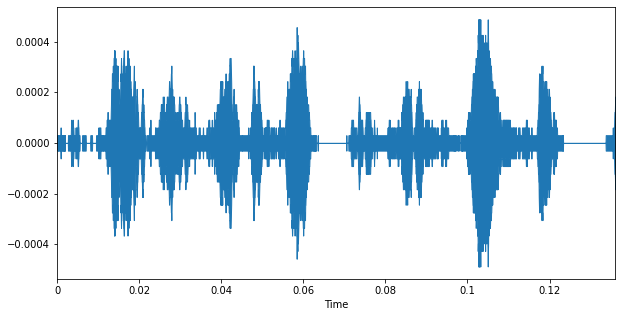

In [39]:
import librosa
import librosa.display
#librosa.display.waveplot(y,sr=sr)
#change path here if u r having local path , wherever ur file is 
for fname in glob("/content/file_*.wav"):
  print(fname)
  x1 , sr = librosa.load(fname)
  plt.figure(figsize=(10, 5))
  librosa.display.waveplot(x1,sr=sr)